## Simple Linear Regression (Simple example)

Fully personal and random datasets

### Step 1: Import Relevant Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3D Graphs
import seaborn as sns
sns.set()

### Step 2: Generate random data to train on

In [3]:
observations = 1000 # number of observations

# Size is the shape of the dataset. 
# Appropriate size is the no of observations by the number of variables
xs = np.random.uniform(low=-10,high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

 # Combines x and z as a 1000x2 matrix
inputs = np.column_stack((xs,zs))
inputs.shape


(1000, 2)

### Step 3: Generate a sample target we will aim at

In [4]:
# Create target
# Lets set target = f(x,z) = 2x - 3z + 5 + noise
# Weights are 2 and 3, Bias is 5
# Our model has to learn this target
# Our final weights and bias should be 2, 3, and 5

noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise
targets.shape

(1000, 1)

### Optional Step: Visualize the datapoints

<function matplotlib.pyplot.show(close=None, block=None)>

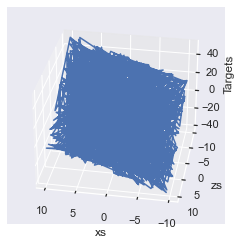

In [8]:
# Plot the data just so we can visualize it

# to use 3d plot we should reshape the target
targets = targets.reshape(observations,)
xs_copy = xs.reshape(observations,)
zs_copy = zs.reshape(observations,)

fig = plt.figure() # Declare the figure
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs_copy,zs_copy,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=100)
plt.show

### Step 4: Build the model and Train

In [5]:
# Initialize the variables

# our initial weights and biases will be picked randomly from [-0.1 to 0.1]
init_range = 0.1 
weights = np.random.uniform(low=-init_range, high=init_range, size=(2,1)) # size is 2x1 as we have two dependent variables
biases = np.random.uniform(low=-init_range, high=init_range, size=1) # size is as many as our output

# Set a learning
learning_rate = 0.02

# Train  the model
for i in range(100):
    # Calculate the output: y = xw + b
    outputs = np.dot(inputs, weights) + biases
   
    # Compare outputs to target through the loss
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / 2 / observations # Mean Loss. Divided by constant does not as it makes the loss lower for higher accuracy
    
    # Print the loss 
    print(loss)
    
    # Adjust weights and biases
    deltas_scaled = deltas / observations
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate* np.sum(deltas_scaled)
    
    
    

[[-0.03035066]
 [ 0.06641226]]
[0.09400311]
234.97711910331086
38.82004281428746
14.541543982820725
11.175001834615438
10.392717962417331
9.945039667815326
9.552937706760346
9.181090710495965
8.824547851804896
8.48218183868621
8.153366101476692
7.837556389271511
7.534237252100483
7.242914547957323
6.963113795303474
6.694379293414328
6.436273366628682
6.188375649802095
5.950282403458447
5.721605856210338
5.5019735732103525
5.291027849583312
5.088425127848914
4.893835438385662
4.706941862024708
4.527440013898355
4.355037547702577
4.189453679566228
4.030418730751393
3.8776736884402045
3.7309697838927143
3.5900680872888215
3.4547391185944156
3.3247624738179002
3.1999264660485025
3.0800277806916267
2.9648711443398574
2.85426900674025
2.7480412353399553
2.64601482191272
2.5480236007884507
2.4539079782269044
2.3635146724948104
2.2766964642230394
2.1933119566372694
2.113225345271641
2.0363061967903517
1.9624292365569467
1.8914741446053553
1.8233253596803565
1.7578718910283537
1.695007137631886

In [7]:
# As observed, we can see that the weights we have is 2 and -2 and 4(accounting the 5+noise for the bias)
print(weights, biases)

[[ 2.00039425]
 [-2.99660834]] [4.35863437]


### Step 5: Plot last outputs vs targets

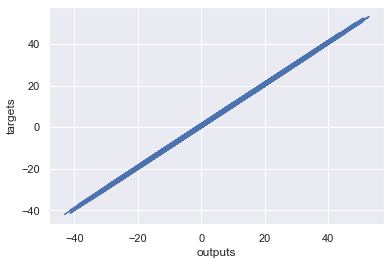

In [10]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# It should show an almost 45 degree line to say that are model is accurate